In [83]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import FuncFormatter

plt.rc("axes", titlesize="medium")
plt.rc("axes", titlelocation="left")
plt.rc("axes.spines", right=False)
plt.rc("axes.spines", top=False)
# sizets = (8, 4.5)
# plt.rc("figure", figsize=sizets)

legend_right = dict(loc="center left", bbox_to_anchor=[1, 0.5])

np.set_printoptions(precision=3)

# for colour palette
colours = ["#333446", "#7F8CAA", "#B8CFCE", "#EAEFEF"]
pallete = plt.cm.colors.ListedColormap(colours)

regression_c = ["#3D74B6", "#DC3C22", "#EAC8A6"]
regression_pallete = plt.cm.colors.ListedColormap(regression_c)

# --- image main
save_dir = "../portfolio/themes/blog/static/images"
file_name = "2025-07-11-spath-cluster-wise-regression"

# we will also set the random seed to 1
seed = 1
np.random.seed(seed)

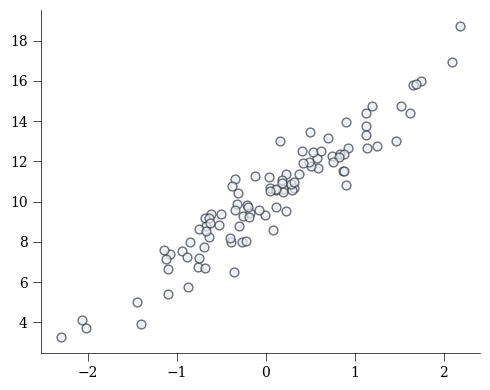

In [84]:
m = 100
l = 1

A = np.random.normal(size=(m, l))
c = np.array([3.0])
y = A @ c + 10 + np.random.normal(scale=1.0, size=m)

fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A,
    y,
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.7,
    s=40,
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-1.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [85]:
def lingress(A, y, intercept=True):
    if intercept:
        A = np.vstack([A.flatten(), np.ones(len(A))]).T
    return np.linalg.inv(A.T @ A) @ A.T @ y

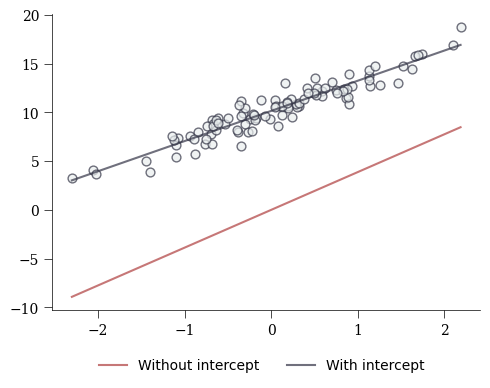

In [86]:
fig, ax = plt.subplots(figsize=(5, 4))

plt.scatter(
    A[:, 0],
    y,
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.7,
    s=40,
)

x_range = np.linspace(min(A), max(A), m)
x = lingress(A, y, intercept=False)
plt.plot(
    x_range,
    x[0] * x_range,
    color="#AF3E3E",
    alpha=0.7,
    label="Without intercept",
)

x = lingress(A, y, intercept=True)
plt.plot(
    x_range,
    x[0] * x_range + x[1],
    color=colours[0],
    alpha=0.7,
    label="With intercept",
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend(
    loc="upper right", fontsize=10, ncol=3, bbox_to_anchor=(0.9, -0.12), frameon=False
)
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-example.svg",
    dpi=75,
    bbox_inches="tight",
    edgecolor="none",
)
plt.show()

In [87]:
# Q = np.column_stack([A, A * 2])
# x = np.linalg.inv(Q.T @ Q) @ Q.T @ y

In [88]:
def obj(y, A, x):
    """
    y: vector of observations
    A: matrix of features
    x: vector of parameters
    """
    cost = 0
    A = np.column_stack([A, np.ones(len(A))])

    for i in range(len(y)):
        preds = 0
        for j in range(len(x)):
            preds += A[i, j] * x[j]
        cost += (y[i] - preds) ** 2
    return cost


obj(y, A, x)

86.14795101998737

In [89]:
def obj(y, A, x):
    """
    y: vector of observations
    A: matrix of features
    x: vector of parameters
    """
    A = np.column_stack([A, np.ones(len(A))])
    return np.sum((y - A @ x) ** 2)


obj(y, A, x)

86.14795101998739

In [90]:
a1 = np.random.uniform(0.0, 1.0, m)
y1 = 4 * a1 + 1 + np.random.normal(0, 0.1, m)

a2 = np.random.uniform(0.0, 1.0, int(m * 0.5))
y2 = -5 * a2 + 5 + np.random.normal(0, 0.1, int(m * 0.5))

a3 = np.random.uniform(0.0, 1.0, int(m * 0.7))
y3 = 0.1 * a3 + 2 + np.random.normal(0, 0.1, int(m * 0.7))

A = np.concatenate([a1, a2, a3]).reshape(-1, 1)
y = np.concatenate([y1, y2, y3])

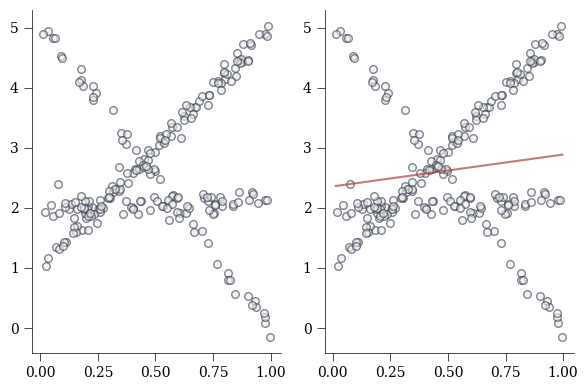

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

ax1.scatter(
    A[:, 0],
    y,
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.6,
    s=30,
)

ax1.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax1.spines[s].set_linewidth(0.5)

x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m)

ax2.scatter(
    A[:, 0],
    y,
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.6,
    s=30,
)

x = lingress(A, y, intercept=True)
ax2.plot(
    x_range,
    x[0] * x_range + x[1],
    color="#AF3E3E",
    alpha=0.7,
)

ax2.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax2.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-4.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

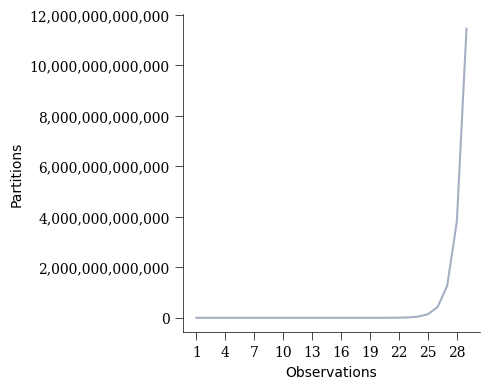

In [92]:
def S(m, n):
    s = 0
    for i in range(n + 1):
        s += (-1) ** (n - i) * math.comb(n, i) * (i**m)
    return s // math.factorial(n)


g_list = []
for i in range(1, 30):
    g_list.append(S(i, 3))

fig, ax = plt.subplots(figsize=(5, 4))

plt.plot(
    g_list,
    color=colours[1],
    alpha=0.7,
)
ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)
ax.set_xlabel("Observations", fontsize=10)
ax.set_ylabel("Partitions", fontsize=10)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_xticks(range(0, 30, 3))
ax.set_xticklabels(range(1, 30, 3), fontsize=10)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-5.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [93]:
a1 = np.random.uniform(0.0, 1.0, m)
y1 = 4 * a1 + 1 + np.random.normal(0, 0.1, m)

a2 = np.random.uniform(0.0, 1.0, int(m * 0.5))
y2 = -5 * a2 + 5 + np.random.normal(0, 0.1, int(m * 0.5))

a3 = np.random.uniform(0.0, 1.0, int(m * 0.7))
y3 = 0.1 * a3 + 2 + np.random.normal(0, 0.1, int(m * 0.7))

A = np.concatenate([a1, a2, a3]).reshape(-1, 1)
y = np.concatenate([y1, y2, y3])

In [94]:
k = 3
l = 1

check = False

while not check:
    C = np.random.randint(0, k, A.shape[0])
    check = np.all(np.bincount(C, minlength=k) > l)

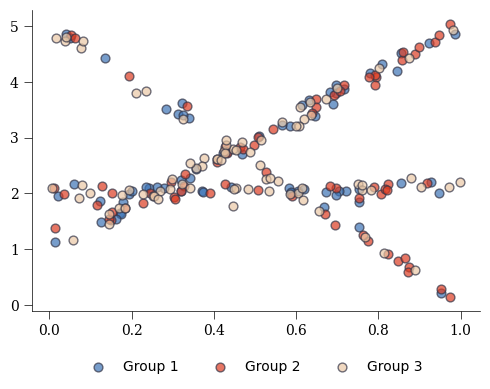

In [95]:
fig, ax = plt.subplots(figsize=(5, 4))

for i in range(3):
    ax.scatter(
        A[C == i, 0],
        y[C == i],
        color=regression_c[i],
        edgecolors=colours[0],
        linewidths=1,
        alpha=0.7,
        s=40,
        label=f"Group {i+1}",
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend(
    loc="upper right", fontsize=10, ncol=3, bbox_to_anchor=(0.9, -0.12), frameon=False
)
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-6.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [96]:
def find_x(A, y, C, k=3):
    x_list = []
    for j in range(k):
        Aj = A[C == j]
        yj = y[C == j]
        x = lingress(Aj, yj, intercept=True)
        x_list.append(x)
    return x_list


x = find_x(A, y, C)

print(x)

[array([0.742, 2.33 ]), array([0.426, 2.325]), array([-0.226,  2.697])]


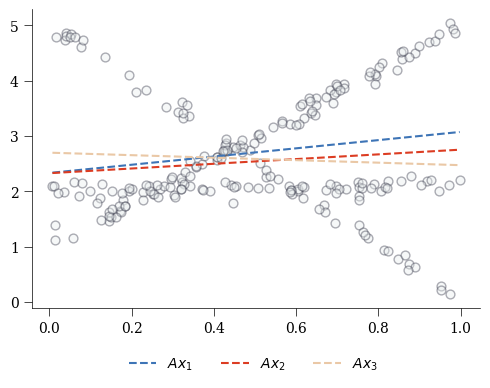

In [97]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.scatter(
    A[:, 0],
    y,
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.4,
    s=40,
)

for i, j in enumerate(x):
    x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m)
    ax.plot(
        x_range,
        j[0] * x_range + j[1],
        color=regression_c[i],
        linewidth=1.5,
        linestyle="--",
        label=f"$Ax_{i+1}$",
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend(
    loc="upper right", fontsize=10, ncol=3, bbox_to_anchor=(0.8, -0.12), frameon=False
)
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-7.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [98]:
def obj(y, A, x, C):
    cost = 0
    A = np.column_stack([A, np.ones(len(A))])
    for j in range(len(x)):
        cost += np.sum((y[C == j] - A[C == j] @ x[j]) ** 2)
    return cost


obj(y, A, x, C)

246.99123021270975

In [99]:
runs = 0
i = 0

cycles = []
while i < m:
    i = (i + 1) % m
    runs += 1
    cycles.append(i)

    if runs > 300:
        break

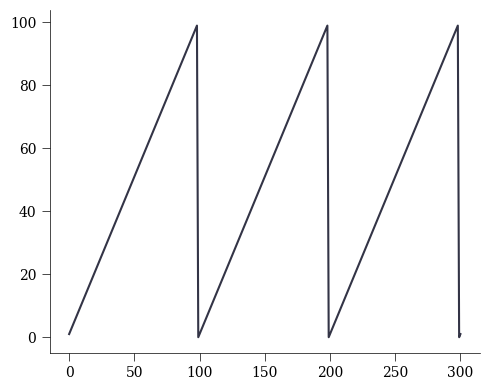

In [100]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(
    cycles,
    color=colours[0],
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-8.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [101]:
k = 3
l = 1

check = False

while not check:
    C = np.random.randint(0, k, A.shape[0])
    check = np.all(np.bincount(C, minlength=k) > l)

In [102]:
lingress(A[C == C[i]], y[C == C[i]], intercept=True)

array([-0.122,  2.517])

In [103]:
def subset_obj(y, A, x):
    A = np.column_stack([A, np.ones(len(A))])
    return np.sum((y - A @ x) ** 2)


def cur_obj(y, A, C, i, p):
    x = lingress(A[C == C[i]], y[C == C[i]])
    c_obj = subset_obj(y[C == C[i]], A[C == C[i]], x)

    x = lingress(A[C == p], y[C == p])
    c_obj += subset_obj(y[C == p], A[C == p], x)
    return c_obj


def new_obj(y, A, C, i, p, Cp):
    x = lingress(A[Cp == C[i]], y[Cp == C[i]])
    n_obj = subset_obj(y[Cp == C[i]], A[Cp == C[i]], x)

    x = lingress(A[Cp == p], y[Cp == p])
    n_obj += subset_obj(y[Cp == p], A[Cp == p], x)
    return n_obj


def iterative_improvement(A, y, C, k, l=1):
    m = A.shape[0]
    i = m - 1

    while True:
        improved = False

        for _ in range(m):
            i = (i + 1) % m

            if np.sum(C == C[i]) <= l + 1:
                continue

            best_p = None
            improvement = 0

            for p in range(k):
                if C[i] == p:
                    continue

                Cp = C.copy()
                Cp[i] = p

                c_obj = cur_obj(y, A, C, i, p)
                n_obj = new_obj(y, A, C, i, p, Cp)

                r = c_obj - n_obj

                if r > improvement:
                    improvement = r
                    best_p = p

            if improvement > 0:
                C[i] = best_p
                improved = True

        if not improved:
            break

    return C

In [ ]:
C = iterative_improvement(A, y, C, k, l=1)

In [105]:
x = find_x(A, y, C)

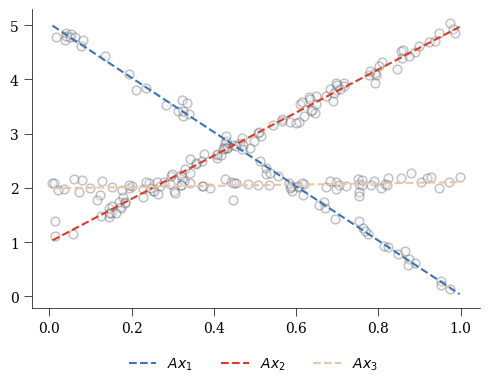

In [106]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.scatter(
    A[:, 0],
    y,
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.3,
    s=40,
)

for i, j in enumerate(x):
    x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m)
    ax.plot(
        x_range,
        j[0] * x_range + j[1],
        color=regression_c[i],
        linewidth=1.5,
        linestyle="--",
        label=f"$Ax_{i+1}$",
    )


ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend(
    loc="upper right", fontsize=10, ncol=3, bbox_to_anchor=(0.8, -0.12), frameon=False
)
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-9.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def iterative_improvement_with_history(A, y, C, k, l=1):
    m = A.shape[0]
    i = m - 1
    history = [C.copy()]

    while True:
        improved = False

        for _ in range(m):
            i = (i + 1) % m

            if np.sum(C == C[i]) <= l + 1:
                continue

            best_p = None
            improvement = 0

            for p in range(k):
                if C[i] == p:
                    continue

                Cp = C.copy()
                Cp[i] = p

                c_obj = cur_obj(y, A, C, i, p)
                n_obj = new_obj(y, A, C, i, p, Cp)

                r = c_obj - n_obj

                if r > improvement:
                    improvement = r
                    best_p = p

            if improvement > 0:
                C[i] = best_p
                improved = True
                history.append(C.copy())

        if not improved:
            break

    return C, history


def create_gif(A, y, history, k, save_dir, file_name):
    fig, ax = plt.subplots(figsize=(5, 4))

    def update(frame):
        ax.clear()
        C = history[frame]

        ax.scatter(
            A[:, 0],
            y,
            c=C,
            cmap=regression_pallete,
            edgecolors=colours[0],
            linewidths=1,
            s=30,
            alpha=0.4,
            vmin=0,
            vmax=k - 1,
        )

        x_list = find_x(A, y, C, k)
        x_range = np.linspace(A[:, 0].min(), A[:, 0].max(), 100)

        for j in range(k):
            x = x_list[j]
            ax.plot(
                x_range,
                x[0] * x_range + x[1],
                color=regression_c[j],
                linewidth=1.5,
                linestyle="--",
                label=f"$Ax_{j+1}$",
            )

        ax.set_title(f"Iteration: {frame + 1}/{len(history)}")
        ax.set_xlim(A[:, 0].min() - 0.1, A[:, 0].max() + 0.1)
        ax.set_ylim(y.min() - 1, y.max() + 1)

    ani = animation.FuncAnimation(fig, update, frames=len(history), repeat=False)

    ani.save(
        f"{save_dir}/{file_name}-1.gif",
        writer="imagemagick",
        fps=10,
        dpi=90,
    )
    plt.close()

In [108]:
check = False
while not check:
    C_initial = np.random.randint(0, k, A.shape[0])
    check = np.all(np.bincount(C_initial, minlength=k) > l + 1)

C_final, history = iterative_improvement_with_history(A, y, C_initial, k, l)

In [109]:
create_gif(A, y, history, k, save_dir, file_name)

MovieWriter imagemagick unavailable; using Pillow instead.


In [110]:
def initialise(A, k, l):
    check = False

    while not check:
        C = np.random.randint(0, k, A.shape[0])
        check = np.all(np.bincount(C, minlength=k) > l)
    return C

In [129]:
k = 3
l = 1

history = []

for _ in range(100):
    C = initialise(A, k, l)
    C = iterative_improvement(A, y, C, k, l=1)
    x = find_x(A, y, C)

    history.append(obj(y, A, x, C))

In [135]:
print(f"Min: {np.min(history):.2f}")
print(f"Max: {np.max(history):.2f}")

Min: 1.75
Max: 14.80


In [138]:
mean_obj = np.mean(history)
cv = np.std(history) / mean_obj
print(f"Mean: {mean_obj:.2f}")
print(f" Std: {np.std(history):.2f}")
print(f"  CV: {cv:.2f}")

Mean: 4.49
 Std: 5.31
  CV: 1.18
